url: https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
#Necessary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [2]:
#read data into dataframes
train_data = pd.read_csv(r'data/train.csv')
test_data = pd.read_csv(r'data/test.csv')

In [3]:
#read data into dataframes
#train_data = pd.read_csv(r"../input/home-data-for-ml-course/train.csv")
#test_data = pd.read_csv(r"../input/home-data-for-ml-course/test.csv")

In [4]:
#let's look at the head for the training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#description of the train data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df = train_data.append(test_data, ignore_index=True)

In [7]:
#show number and percentage of null values in columns
s = train_df.isna().sum()
m = train_df.isna().mean()
print(s[s.values >0])
print(m[m.values >0])

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64
MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
Bs

Find all the columns with numeric data and process them. I will deal with the categorical features later. So, this is the list of numeric features: "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"

In [8]:
numeric_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
train_df[numeric_cols].isnull().sum()

LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

"LotFrontage" has 486 null values and "MasVnrArea" has 23 null values. The following columns have 1 value missing each:
<br>BsmtFinSF1
<br>BsmtFinSF2
<br>BsmtUnfSF
<br>TotalBsmtSF
<br>GarageArea

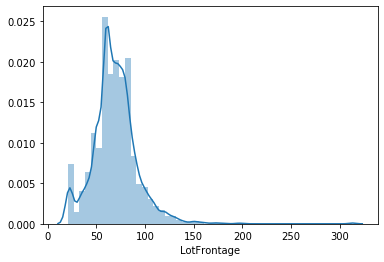

In [9]:
#distribution of LotFrontage
sns.distplot(train_df["LotFrontage"])

In [10]:
#I am going to fill LotFrontage with the mean
train_df["LotFrontage"]= train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())

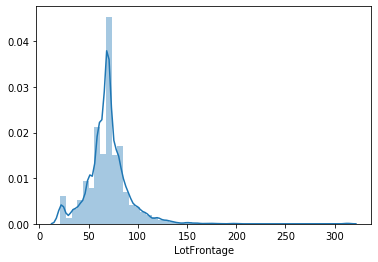

In [11]:
#look at the distribution of lotfrontage again
sns.distplot(train_df["LotFrontage"])

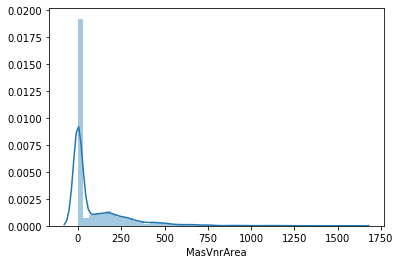

In [12]:
#distribution of MasVnrArea
sns.distplot(train_df["MasVnrArea"])

In [13]:
#lets look at the count of values that are equal to 0
print((train_df["MasVnrArea"]==0).sum())
print((train_df["MasVnrArea"]==0).mean())

1738
0.5954093867762933


In [14]:
#filling the 23 empty values with mean of the field
train_df["MasVnrArea"]= train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())

In [15]:
#filling the other empty values with mean of the fields
train_df["BsmtFinSF1"]= train_df["BsmtFinSF1"].fillna(train_df["BsmtFinSF1"].mean())
train_df["BsmtFinSF2"]= train_df["BsmtFinSF2"].fillna(train_df["BsmtFinSF2"].mean())
train_df["BsmtUnfSF"]= train_df["BsmtUnfSF"].fillna(train_df["BsmtUnfSF"].mean())
train_df["TotalBsmtSF"]= train_df["TotalBsmtSF"].fillna(train_df["TotalBsmtSF"].mean())
train_df["GarageArea"]= train_df["GarageArea"].fillna(train_df["GarageArea"].mean())

In [16]:
#let's look at the number of 0s in each field
for column in numeric_cols:
    print(column+":"+str((train_df[column]==0).sum()))

LotFrontage:0
LotArea:0
MasVnrArea:1738
BsmtFinSF1:929
BsmtFinSF2:2571
BsmtUnfSF:241
TotalBsmtSF:78
1stFlrSF:0
2ndFlrSF:1668
LowQualFinSF:2879
GrLivArea:0
GarageArea:157
WoodDeckSF:1523
OpenPorchSF:1298
EnclosedPorch:2460
3SsnPorch:2882
ScreenPorch:2663
PoolArea:2906
MiscVal:2816


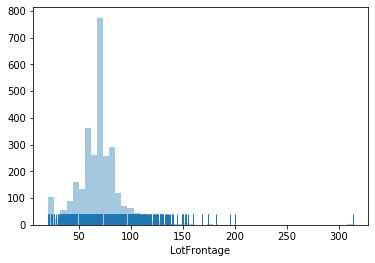

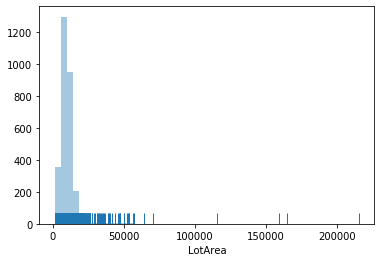

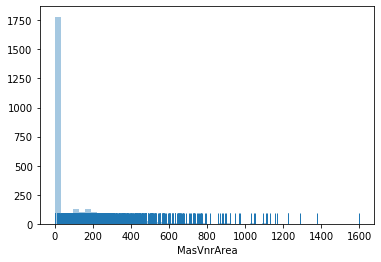

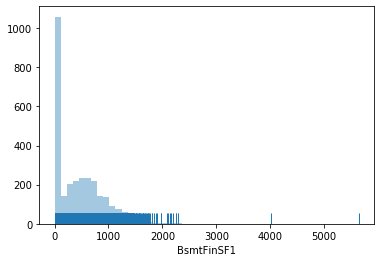

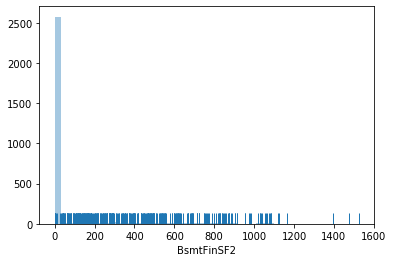

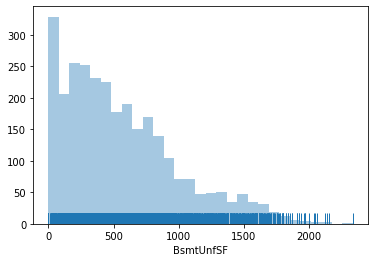

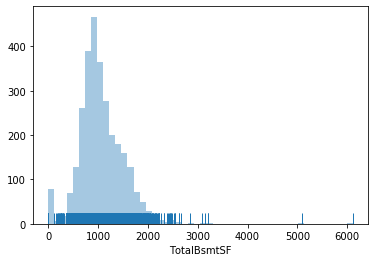

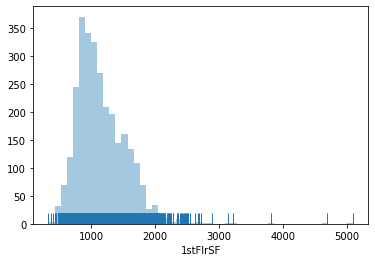

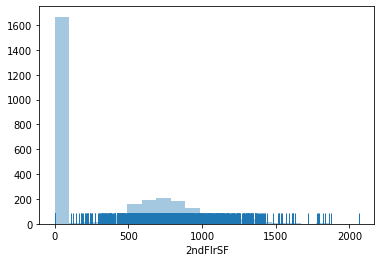

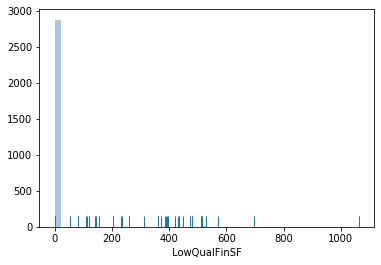

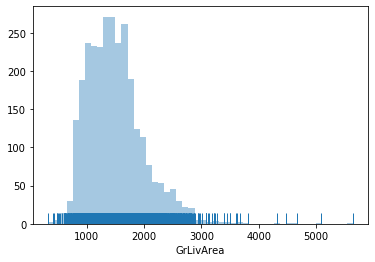

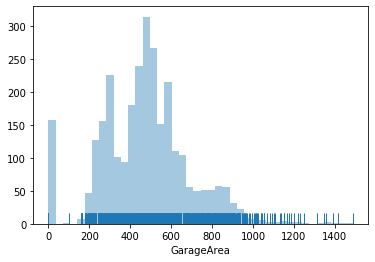

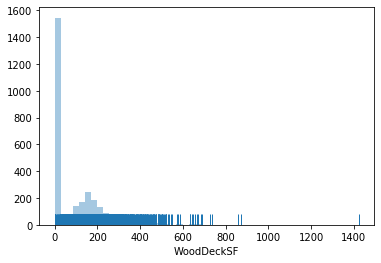

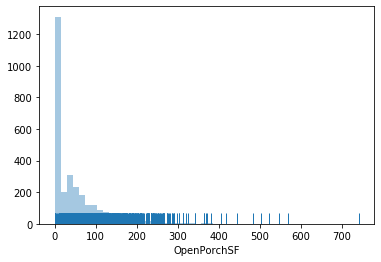

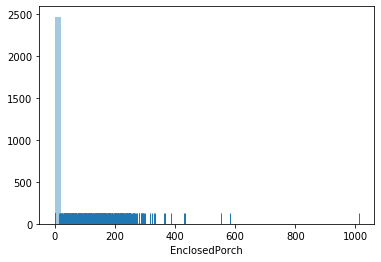

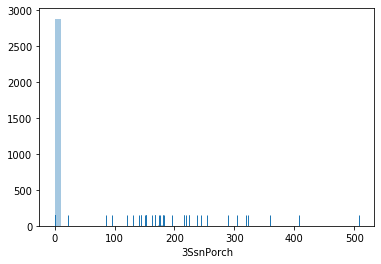

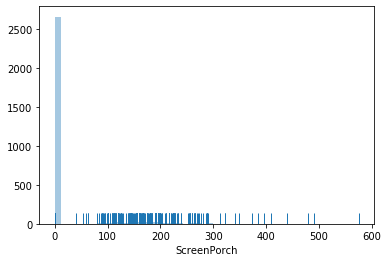

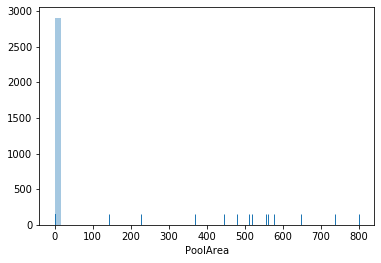

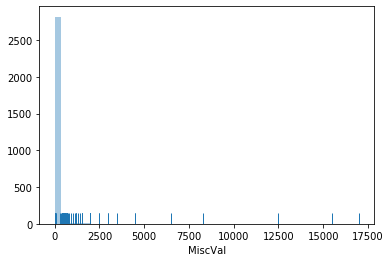

In [17]:
#Look at the distribution of the data for the fields
for column in numeric_cols:
    plt.figure()
    sns.distplot(train_df[column], kde=False, rug=True)

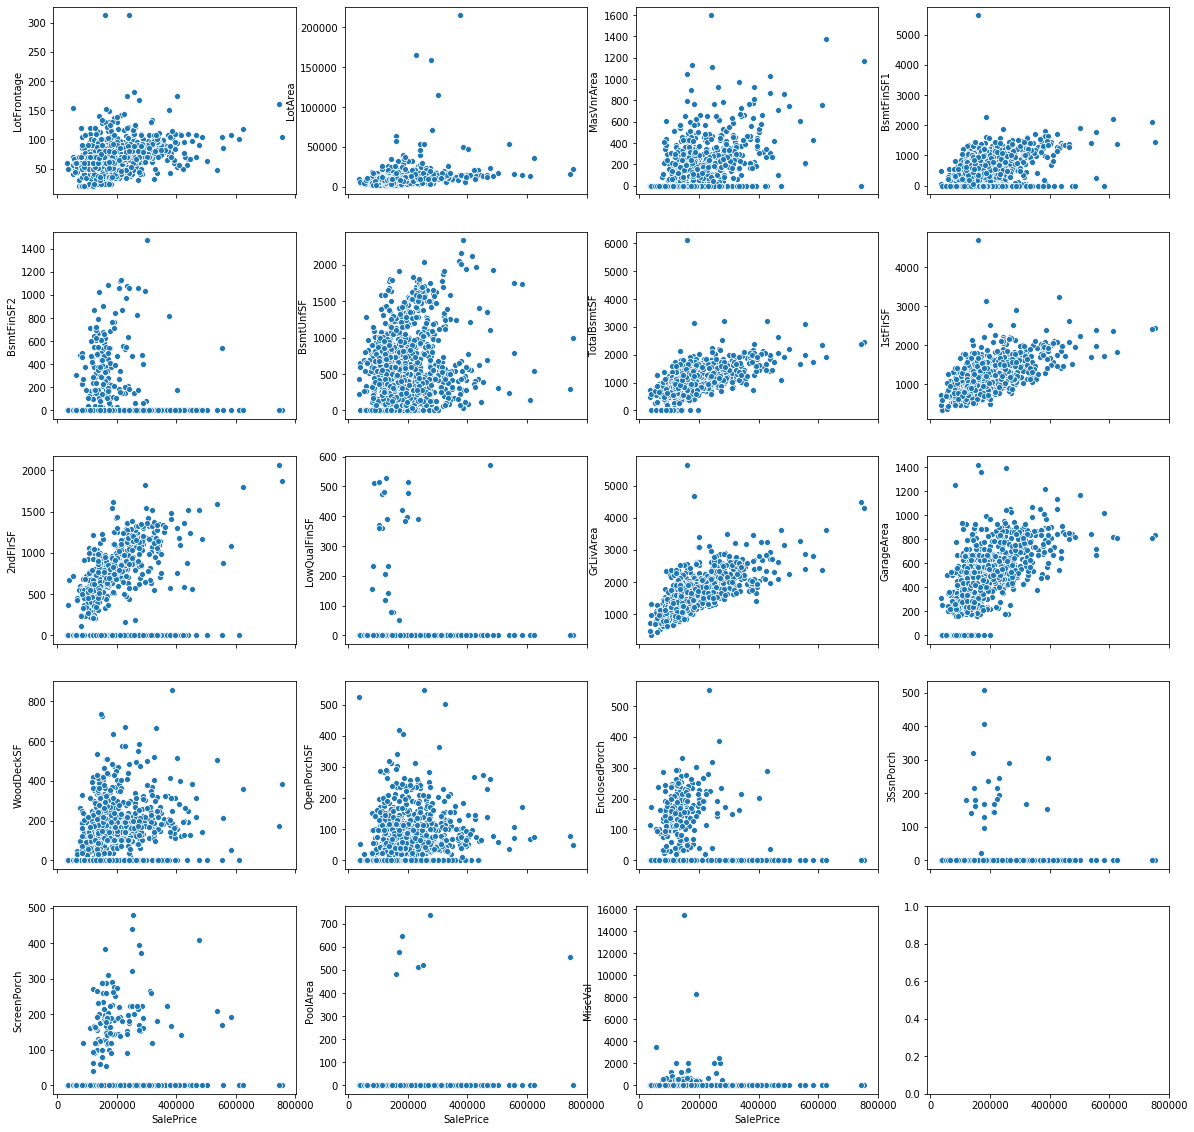

In [18]:
#we will look at the scatterplot of the numeric features with the saleprice
f, axes = plt.subplots(5, 4, figsize=(20, 20), sharex=True)
for ax, feature in zip(axes.flat, numeric_cols):
    sns.scatterplot( x="SalePrice", y=feature, data=train_df, ax=ax)

In [19]:
#I will also look at the correlation with the saleprice
train_df[numeric_cols].corrwith(train_df['SalePrice'])

LotFrontage      0.334820
LotArea          0.263843
MasVnrArea       0.475210
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
dtype: float64

Now Let's look at the categorical fields in the data.
The following are the categorical fields: "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional", "Fireplaces", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"

In [20]:
categorical_cols = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional", "Fireplaces", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleType", "SaleCondition"]
train_df[categorical_cols].isnull().sum()

MSSubClass          0
MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQ

I will process the fields in groups of similar fields and then I will process the rest of the fields.
<br> I will start with basement fields first. There are 78 fields with 0 in TotalBsmtSF. This means that there are 78 houses with no basement.
<br>BsmtQual: identify 3, rest should be set to no_bsmt
<br>BsmtCond: identify 4, rest should be set to no_bsmt
<br>BsmtExposure: identify 4, rest should be set to no_bsmt
<br>BsmtFinType1: identify 1, rest should be set to no_bsmt
<br>BsmtFinType2: identify 2, rest should be set to no_bsmt

In [21]:
train_df["BsmtFinType1"][train_df.loc[(train_df["TotalBsmtSF"]!=0)  & (train_df["BsmtFinType1"].isnull())]["BsmtFinType1"].index] = train_df["BsmtFinType1"].value_counts().idxmax()
train_df["BsmtFinType2"][train_df.loc[(train_df["TotalBsmtSF"]!=0)  & (train_df["BsmtFinType2"].isnull())]["BsmtFinType2"].index] = train_df["BsmtFinType2"].value_counts().idxmax()
train_df["BsmtQual"][train_df.loc[(train_df["TotalBsmtSF"]!=0)  & (train_df["BsmtQual"].isnull())]["BsmtQual"].index] = train_df["BsmtQual"].value_counts().idxmax()
train_df["BsmtCond"][train_df.loc[(train_df["TotalBsmtSF"]!=0)  & (train_df["BsmtCond"].isnull())]["BsmtCond"].index] = train_df["BsmtCond"].value_counts().idxmax()
train_df["BsmtExposure"][train_df.loc[(train_df["TotalBsmtSF"]!=0)  & (train_df["BsmtExposure"].isnull())]["BsmtExposure"].index] = train_df["BsmtExposure"].value_counts().idxmax()

D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [22]:
#checking the number of null values
print(train_df["BsmtFinType1"].isnull().sum())
print(train_df["BsmtFinType2"].isnull().sum())
print(train_df["BsmtQual"].isnull().sum())
print(train_df["BsmtCond"].isnull().sum())
print(train_df["BsmtExposure"].isnull().sum())

78
78
78
78
78


In [23]:
#filling the values with "no_bsmt"
train_df["BsmtFinType1"]= train_df["BsmtFinType1"].fillna("no_bsmt")
train_df["BsmtFinType2"]= train_df["BsmtFinType2"].fillna("no_bsmt")
train_df["BsmtQual"]= train_df["BsmtQual"].fillna("no_bsmt")
train_df["BsmtCond"]= train_df["BsmtCond"].fillna("no_bsmt")
train_df["BsmtExposure"]= train_df["BsmtExposure"].fillna("no_bsmt")

Now I will process the garage fields. There are 157 fields with 0 in GarageArea. This means that there are 157 houses with no garage.
<br>GarageType: set to no_garage
<br>GarageYrBlt: identify 2, rest should be set to no_garage
<br>GarageFinish: identify 2, rest should be set to no_garage
<br>GarageQual: identify 2, rest should be set to no_garage
<br>GarageCond: identify 2, rest should be set to no_garage

In [24]:
train_df["GarageYrBlt"][train_df.loc[(train_df["GarageArea"]!=0)  & (train_df["GarageYrBlt"].isnull())]["GarageYrBlt"].index] = train_df["GarageYrBlt"].value_counts().idxmax()
train_df["GarageFinish"][train_df.loc[(train_df["GarageArea"]!=0)  & (train_df["GarageFinish"].isnull())]["GarageFinish"].index] = train_df["GarageFinish"].value_counts().idxmax()
train_df["GarageQual"][train_df.loc[(train_df["GarageArea"]!=0)  & (train_df["GarageQual"].isnull())]["GarageQual"].index] = train_df["GarageQual"].value_counts().idxmax()
train_df["GarageCond"][train_df.loc[(train_df["GarageArea"]!=0)  & (train_df["GarageCond"].isnull())]["GarageCond"].index] = train_df["GarageCond"].value_counts().idxmax()

D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [25]:
#checking the number of null values
print(train_df["GarageType"].isnull().sum())
print(train_df["GarageYrBlt"].isnull().sum())
print(train_df["GarageFinish"].isnull().sum())
print(train_df["GarageQual"].isnull().sum())
print(train_df["GarageCond"].isnull().sum())

157
157
157
157
157


In [26]:
#filling garage year built with current year and the rest of the values with "no_garage".
year = datetime.date.today().year
train_df["GarageYrBlt"]= train_df["GarageYrBlt"].fillna(year)
train_df["GarageType"]= train_df["GarageType"].fillna("no_garage")
train_df["GarageFinish"]= train_df["GarageFinish"].fillna("no_garage")
train_df["GarageQual"]= train_df["GarageQual"].fillna("no_garage")
train_df["GarageCond"]= train_df["GarageCond"].fillna("no_garage")

Now I will process the garage fields. There are 2906 fields with 0 in PoolArea. This means that there are 2906 houses with no Pool.
PoolQC: identify 3, rest should be set to no_pool

In [27]:
train_df["PoolQC"][train_df.loc[(train_df["PoolArea"]!=0)  & (train_df["PoolQC"].isnull())]["PoolQC"].index] = train_df["PoolQC"].value_counts().idxmax()

D:\Arnab\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Alley: NA means there is no access to alley and So, NA should be treated as a value.
<br>Same is the case with the following:
<br>FireplaceQu
<br>PoolQC
<br>Fence
<br>MiscFeature

In [28]:
train_df["Alley"]= train_df["Alley"].fillna("no_alley")
train_df["PoolQC"]= train_df["PoolQC"].fillna("no_pool")
train_df["FireplaceQu"]= train_df["FireplaceQu"].fillna("no_fp")
train_df["Fence"]= train_df["Fence"].fillna("no_fence")
train_df["MiscFeature"]= train_df["MiscFeature"].fillna("no_misc")

In [29]:
#MasVnrType has 24 nan values and I will fill them up based on the ratio of the occurences of the other values for this feature
#Getting all the ratios
MasVnrType_data = (train_df["MasVnrType"].value_counts()/train_df["MasVnrType"].count())
#imputing missing values
train_df["MasVnrType"]= train_df["MasVnrType"].fillna(pd.Series(np.random.choice(MasVnrType_data.index,p=MasVnrType_data.values, size=len(train_df))))

In [30]:
#filling the rest of the null values with most frequent values for each column
train_df["MSZoning"] = train_df["MSZoning"].fillna(train_df["MSZoning"].value_counts().idxmax())
train_df["Utilities"] = train_df["Utilities"].fillna(train_df["Utilities"].value_counts().idxmax())
train_df["Exterior1st"] = train_df["Exterior1st"].fillna(train_df["Exterior1st"].value_counts().idxmax())
train_df["Exterior2nd"] = train_df["Exterior2nd"].fillna(train_df["Exterior2nd"].value_counts().idxmax())
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].value_counts().idxmax())
train_df["BsmtFullBath"] = train_df["BsmtFullBath"].fillna(train_df["BsmtFullBath"].value_counts().idxmax())
train_df["BsmtHalfBath"] = train_df["BsmtHalfBath"].fillna(train_df["BsmtHalfBath"].value_counts().idxmax())
train_df["KitchenQual"] = train_df["KitchenQual"].fillna(train_df["KitchenQual"].value_counts().idxmax())
train_df["Functional"] = train_df["Functional"].fillna(train_df["Functional"].value_counts().idxmax())
train_df["GarageCars"] = train_df["GarageCars"].fillna(train_df["GarageCars"].value_counts().idxmax())
train_df["SaleType"] = train_df["SaleType"].fillna(train_df["SaleType"].value_counts().idxmax())

Replace all values in the categorical fields that had null values with numbers

In [31]:
alley_type_dict = {"no_alley":0, "Grvl":1, "Pave":2}
train_df["Alley"] = train_df["Alley"].apply(lambda x: alley_type_dict[x])

MasVnrType_dict = {"BrkCmn":0, "BrkFace":1, "None":2, "Stone":3, "CBlock":4}
train_df["MasVnrType"] = train_df["MasVnrType"].apply(lambda x: MasVnrType_dict[x])

BsmtQC_dict = {"no_bsmt":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
train_df["BsmtQual"] = train_df["BsmtQual"].apply(lambda x: BsmtQC_dict[x])
train_df["BsmtCond"] = train_df["BsmtCond"].apply(lambda x: BsmtQC_dict[x])

BsmtExposure_dict = {"no_bsmt":0, "No":1, "Mn":2, "Av":3, "Gd":4}
train_df["BsmtExposure"] = train_df["BsmtExposure"].apply(lambda x: BsmtExposure_dict[x])

BsmtFinType_dict = {"no_bsmt":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].apply(lambda x: BsmtFinType_dict[x])
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].apply(lambda x: BsmtFinType_dict[x])

FireplaceQu_dict = {"no_fp":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
train_df["FireplaceQu"] = train_df["FireplaceQu"].apply(lambda x: FireplaceQu_dict[x])

GarageType_dict = {"no_garage":0, "Detchd":1, "CarPort":2, "BuiltIn":3, "Basment":4, "Attchd":5, "2Types":6}
train_df["GarageType"] = train_df["GarageType"].apply(lambda x: GarageType_dict[x])

GarageFinish_dict = {"no_garage":0, "Unf":1, "RFn":2, "Fin":3}
train_df["GarageFinish"] = train_df["GarageFinish"].apply(lambda x: GarageFinish_dict[x])

GarageQC_dict = {"no_garage":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
train_df["GarageQual"] = train_df["GarageQual"].apply(lambda x: GarageQC_dict[x])
train_df["GarageCond"] = train_df["GarageCond"].apply(lambda x: GarageQC_dict[x])

PoolQC_dict = {"no_pool":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
train_df["PoolQC"] = train_df["PoolQC"].apply(lambda x: PoolQC_dict[x])

Fence_dict = {"no_fence":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}
train_df["Fence"] = train_df["Fence"].apply(lambda x: Fence_dict[x])

MiscFeature_dict = {"no_misc":0, "TenC":1, "Shed":2, "Othr":3, "Gar2":4, "Elev":5}
train_df["MiscFeature"] = train_df["MiscFeature"].apply(lambda x: MiscFeature_dict[x])

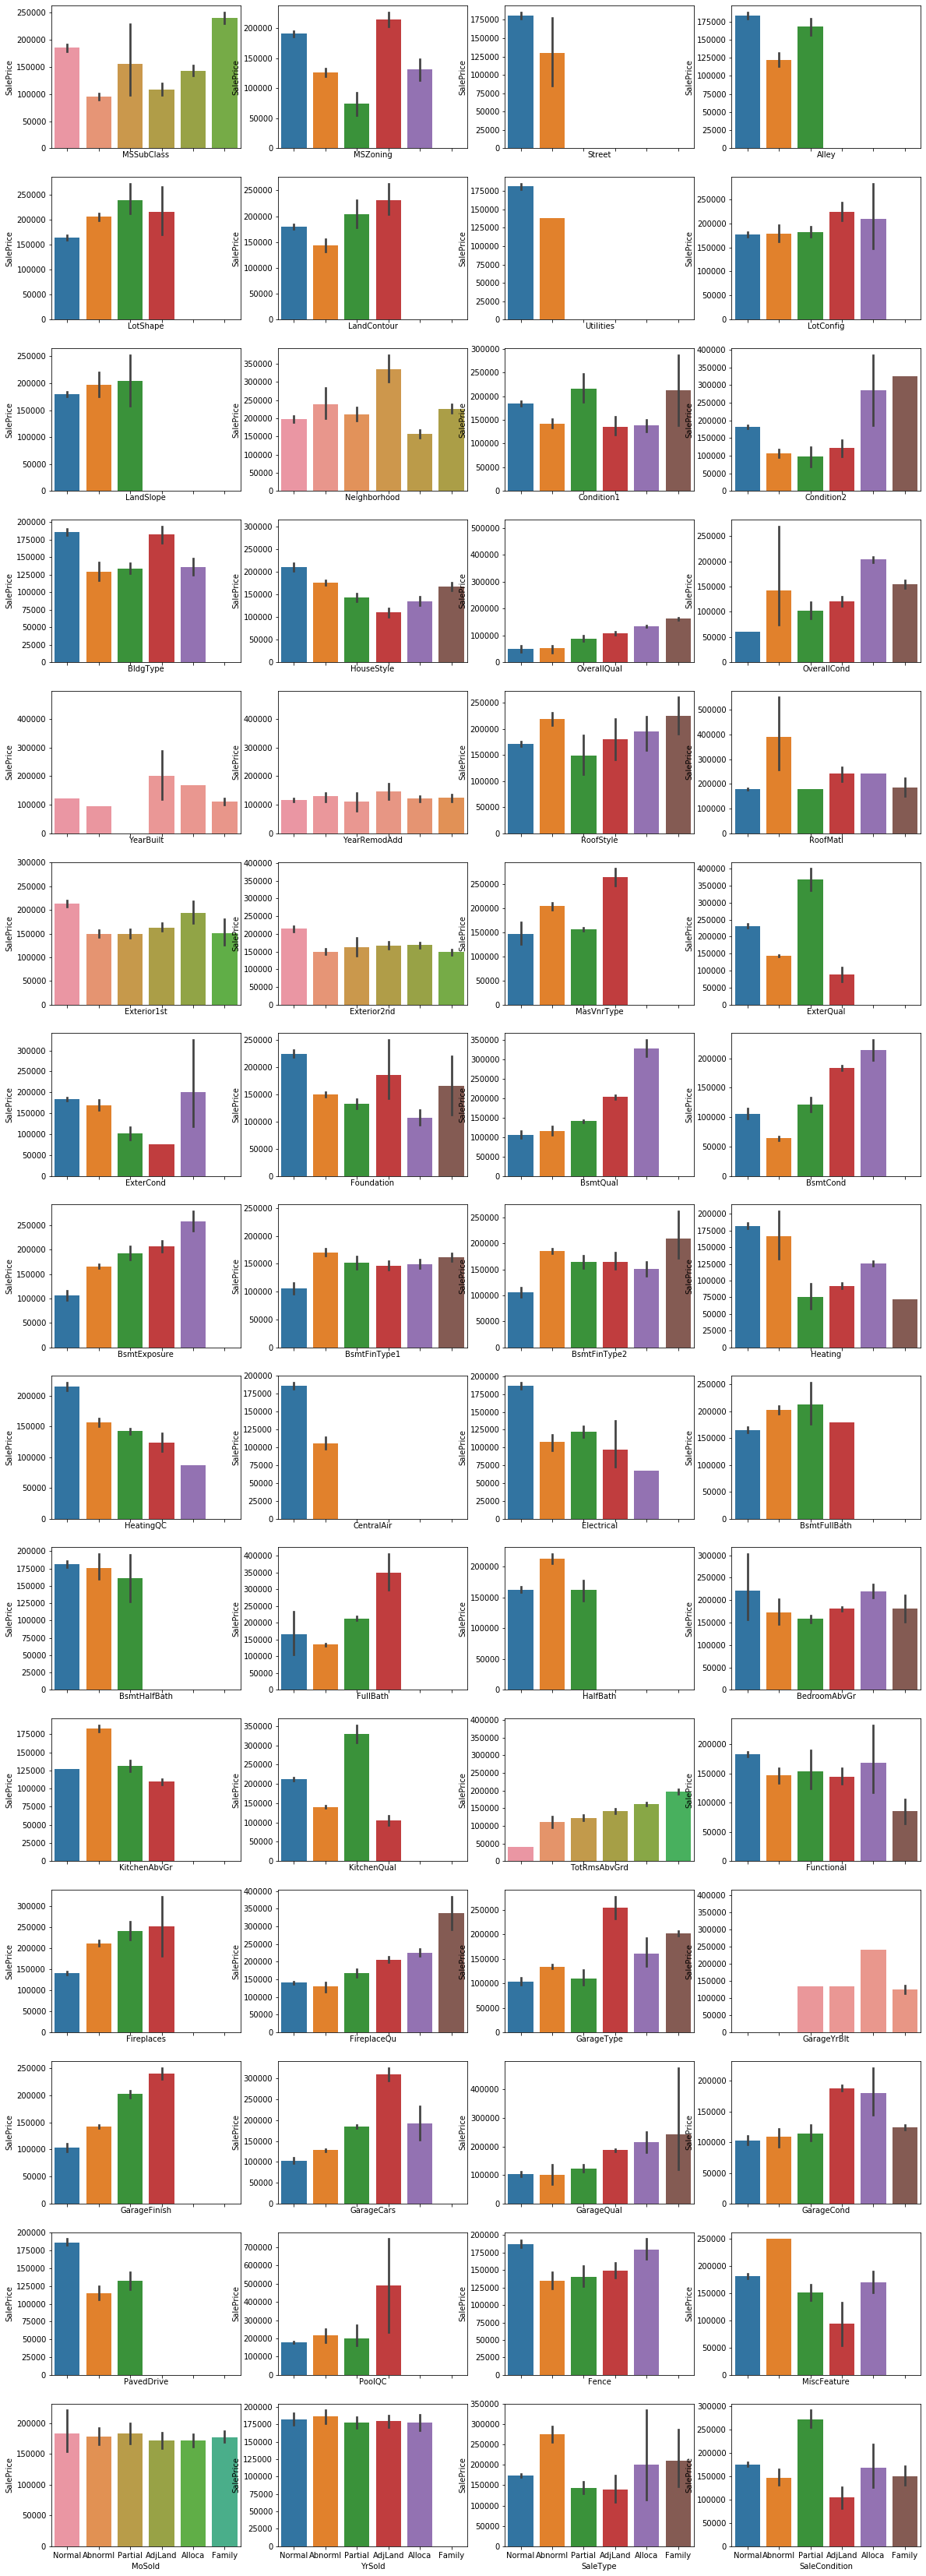

In [32]:
f1, axes1 = plt.subplots(15, 4, figsize=(20, 60), sharex=True)
for ax, feature in zip(axes1.flat, categorical_cols):
    sns.barplot( x=feature, y="SalePrice", data=train_df, ax=ax)

All the year fields will be converted to age fields.
<br>YearBuilt: age
<br>YearRemodAdd: ageAftRemod
<br>garage year built: Garage_Age
<br>sale year and sale month: sale_age

In [33]:
#there is a value with year 2207. Converting it to the year of remodelling of the property
train_df.loc[train_df["GarageYrBlt"]==2207,"GarageYrBlt"] = train_df.loc[train_df["GarageYrBlt"]==2207]["YearRemodAdd"]

In [34]:
#create age columns based on year built and year of remodelling
year = datetime.date.today().year
train_df["age"] = year-train_df["YearBuilt"]
train_df["ageAftRemod"] = year-train_df["YearRemodAdd"]
train_df["Garage_Age"] = year - train_df["GarageYrBlt"]

In [35]:
#define a dataframe to hold the year and month data
saledate_df = train_df[["YrSold","MoSold"]]

saledate_df = saledate_df.rename(columns={"YrSold": "Year", "MoSold": "Month"})

#Get a date field in the dataframe
from datetime import datetime
saledate_df = saledate_df[["Year","Month"]].assign(Date=pd.to_datetime(saledate_df[["Year","Month"]].assign(day=1)))

#get sale age in years
train_df["sale_age"] = (((datetime.today() - saledate_df["Date"])/np.timedelta64(1, 'M')).astype(int))/12

Deriving a few new features from existing features

In [36]:
Condition = ["Condition1","Condition2"]
Condition_dict = {"Artery":0, "Feedr":1, "Norm":2, "RRNn":3, "RRAn":4, "PosN":5, "PosA":6, "RRNe":7, "RRAe":8}
for column in Condition:
    train_df[column] = train_df[column].apply(lambda x: Condition_dict[x])

In [37]:
#new field with condition
train_df["Condition"] = train_df[["Condition1","Condition2"]].mean(axis = 1)

#new field with Overall Quality and Overall Condition
train_df["OverallQC"] = train_df[["OverallQual","OverallCond"]].mean(axis = 1)

In [38]:
Exterior = ["Exterior1st","Exterior2nd"]
Exterior_dict = {"AsbShng":0,"AsphShn":1,"BrkComm":2,"Brk Cmn":2,"BrkFace":3,"CBlock":4,"CemntBd":5,"CmentBd":5,"HdBoard":6,"ImStucc":7,"MetalSd":8,"Other":9,"Plywood":10,"PreCast":11,"Stone":12,"Stucco":13,"VinylSd":14,"Wd Sdng":15,"Wd Shng":15,"WdShing":16}
for column in Exterior:
    train_df[column] = train_df[column].apply(lambda x: Exterior_dict[x])

In [39]:
#creating new exterior field
train_df["Exterior"] = train_df[["Exterior1st","Exterior2nd"]].mean(axis = 1)

In [40]:
ExteriorQC = ["ExterQual","ExterCond"]
ExteriorQC_dict = {"Po":0,"Fa":1,"Ta":2,"TA":2,"Gd":3,"Ex":4}
for column in ExteriorQC:
    train_df[column] = train_df[column].apply(lambda x: ExteriorQC_dict[x])

In [41]:
#creating a few more fields
train_df["ExteriorQC"] = train_df[["ExterQual","ExterCond"]].mean(axis = 1)
train_df["BsmtQC"] = train_df[["BsmtQual","BsmtCond"]].mean(axis = 1)
train_df["BsmtFinType"] = train_df[["BsmtFinType1","BsmtFinType2"]].mean(axis = 1)
train_df["BsmtBath"] = train_df[["BsmtFullBath","BsmtHalfBath"]].sum(axis = 1)
train_df["Bath"] = train_df[["FullBath","HalfBath"]].sum(axis = 1)
train_df["GarageQC"] = train_df[["GarageQual","GarageCond"]].mean(axis = 1)
train_df["PorchArea"] = train_df[["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]].sum(axis = 1)

In [42]:
label_encoded_cols = ["MSSubClass","MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","BldgType","HouseStyle","RoofStyle","RoofMatl","Foundation","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","PavedDrive","SaleType","SaleCondition"]
labelencoder = LabelEncoder()
for column in label_encoded_cols:
    train_df[column] = labelencoder.fit_transform(train_df[column])

In [43]:
#Let's look at the head of the data now
pd.set_option('display.max_columns', None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,ageAftRemod,Garage_Age,sale_age,Condition,OverallQC,Exterior,ExteriorQC,BsmtQC,BsmtFinType,BsmtBath,Bath,GarageQC,PorchArea
0,1,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,14,14,1,196.0,3,2,2,4,3,1,6,706.0,1,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,0,5,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500.0,17,17,17.0,12.333333,2.0,6.0,14.0,2.5,3.5,3.5,1.0,3,3.0,61
1,2,0,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,4,3,4,5,978.0,1,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,3,5,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500.0,44,44,44.0,13.083333,1.5,7.0,8.0,2.0,3.5,3.0,1.0,2,3.0,0
2,3,5,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,14,14,1,162.0,3,2,2,4,3,2,6,486.0,1,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500.0,19,18,19.0,11.750000,2.0,6.0,14.0,2.5,3.5,3.5,1.0,3,3.0,42
3,4,6,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,15,15,2,0.0,2,2,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,1,1998.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000.0,105,50,22.0,14.333333,2.0,6.0,15.0,2.0,3.5,3.0,1.0,1,3.0,307
4,5,5,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,14,14,1,350.0,3,2,2,4,3,3,6,655.0,1,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000.0,20,20,20.0,11.500000,2.0,6.5,14.0,2.5,3.5,3.5,1.0,3,3.0,84


In [44]:
train_df["has_pool"] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df["has_2ndfloor"] = train_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_df["has_garage"] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df["has_bsmt"] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_df["has_fireplace"] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [45]:
#let's drop the columns used to derive features
train_df = train_df.drop(columns=["Condition1","Condition2","OverallQual","OverallCond","YearBuilt","YearRemodAdd","Exterior1st","Exterior2nd","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","GarageYrBlt","GarageQual","GarageCond","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","MoSold","YrSold"],axis=1)

In [46]:
#finding skewness of features
numeric_cols = ["LotFrontage","LotArea","MasVnrArea","TotalBsmtSF","GrLivArea","GarageArea","WoodDeckSF","PoolArea","MiscVal","age","ageAftRemod","Garage_Age","sale_age","PorchArea"]
skew_features = train_df[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [47]:
skew_features

MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
MasVnrArea      2.611549
PorchArea       2.237266
WoodDeckSF      1.842433
LotFrontage     1.645574
GrLivArea       1.269358
TotalBsmtSF     1.162484
age             0.599806
Garage_Age      0.592145
ageAftRemod     0.451020
GarageArea      0.241218
sale_age       -0.049982
dtype: float64

In [48]:
#normalizing features with high skew
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    train_df[i] = boxcox1p(train_df[i], boxcox_normmax(train_df[i] + 1))

D:\Arnab\Anaconda\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
D:\Arnab\Anaconda\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [49]:
#let's look at the number of 0s in each field
for column in train_df.columns:
    print(column+":"+str((train_df[column]==0).sum()/len(train_df)))

Id:0.0
MSSubClass:0.3696471394313121
MSZoning:0.00856457690990065
LotFrontage:0.0
LotArea:0.0
Street:0.0041109969167523125
Alley:0.9321685508735869
LotShape:0.3316204179513532
LandContour:0.040082219938335044
Utilities:0.999657416923604
LotConfig:0.1750599520383693
LandSlope:0.9516957862281603
Neighborhood:0.009592326139088728
BldgType:0.8307639602603631
HouseStyle:0.10757108598835217
RoofStyle:0.006851661527920521
RoofMatl:0.00034258307639602604
MasVnrType:0.00856457690990065
MasVnrArea:0.5954093867762933
Foundation:0.1065433367591641
BsmtExposure:0.02672147995889003
TotalBsmtSF:0.02672147995889003
Heating:0.00034258307639602604
HeatingQC:0.5114765330592669
CentralAir:0.0671462829736211
Electrical:0.0644056183624529
GrLivArea:0.0
BedroomAbvGr:0.0027406646111682084
KitchenAbvGr:0.0010277492291880781
KitchenQual:0.07022953066118534
TotRmsAbvGrd:0.0
Functional:0.006509078451524495
Fireplaces:0.48646796848235696
FireplaceQu:0.48646796848235696
GarageType:0.05378554299417609
GarageFinish:0

In [50]:
#drop columns with more than 94% 0s in their values
train_df = train_df.drop(columns=["MiscVal","MiscFeature","Street","PoolQC","PoolArea","LandSlope","Utilities"],axis=1)

In [51]:
#Let's look at the head of the data now
pd.set_option('display.max_columns', None)
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'Fence', 'SaleType', 'SaleCondition',
       'SalePrice', 'age', 'ageAftRemod', 'Garage_Age', 'sale_age',
       'Condition', 'OverallQC', 'Exterior', 'ExteriorQC', 'BsmtQC',
       'BsmtFinType', 'BsmtBath', 'Bath', 'GarageQC', 'PorchArea', 'has_pool',
       'has_2ndfloor', 'has_garage', 'has_bsmt', 'has_fireplace'],
      dtype='object')

getting the training and the test data

In [52]:
train_data = train_df[train_df["Id"] <=1460 ]
test_data = train_df[train_df["Id"] >1460 ]

Identifying and removing the outlier values in columns

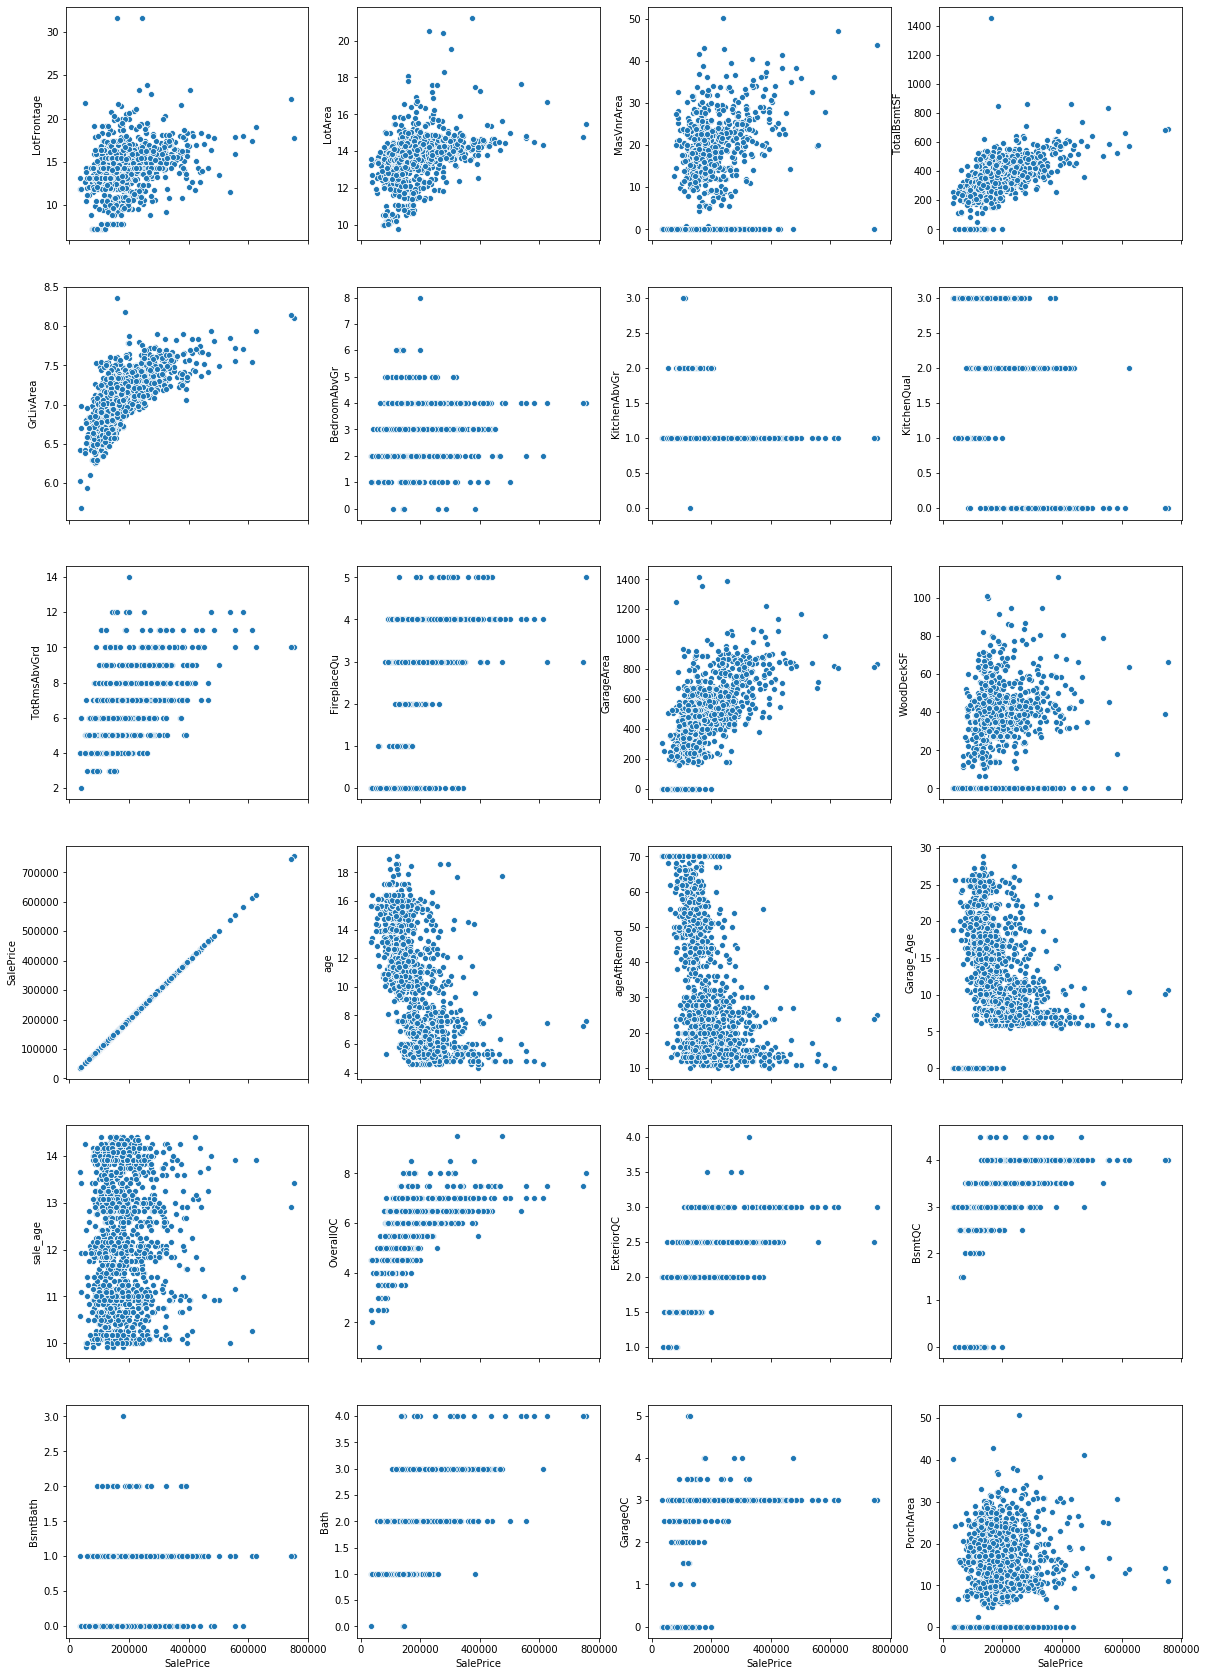

In [53]:
outlier_cols = ["LotFrontage","LotArea","MasVnrArea","TotalBsmtSF","GrLivArea","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","FireplaceQu","GarageArea","WoodDeckSF","SalePrice","age","ageAftRemod","Garage_Age","sale_age","OverallQC","ExteriorQC","BsmtQC","BsmtBath","Bath","GarageQC","PorchArea"]
f1, axes1 = plt.subplots(6, 4, figsize=(20, 30), sharex=True)
for ax, feature in zip(axes1.flat, outlier_cols):
    sns.scatterplot( x="SalePrice", y=feature, data=train_data, ax=ax)

<br>LotFrontage: remove all above 26 (2)
<br>LotArea: remove all above 20 (3)
<br>MasVnrArea: 
<br>TotalBsmtSF:remove all above 1200 (1)
<br>GrLivArea: remove all less than 5.75 and greater than 8.3 (2)
<br>BedroomAbvGr: remove all above 7 (1)
<br>KitchenAbvGr: remove all with 0 kitchens (1)
<br>KitchenQual
<br>TotRmsAbvGrd:remove all above 13 (1)
<br>FireplaceQu: 
<br>GarageArea: remove all above 1250 (3)
<br>WoodDeckSF:remove all above 105 (1)
<br>SalePrice: remove all above 700000 (2)
<br>age:
<br>ageAftRemod
<br>Garage_Age
<br>sale_age
<br>OverallQC
<br>ExteriorQC
<br>BsmtQC
<br>BsmtBath: remove all above 2.5 (1)
<br>Bath
<br>GarageQC
<br>PorchArea: remove all above 45 (1)
<br>sns.boxplot(x=train_data["PorchArea"])
<br>sns.boxplot(x=train_data["PorchArea"][train_data["PorchArea"]<45])

In [54]:
print(train_data[(train_data['LotFrontage'] > 26)].shape)
print(train_data[(train_data['LotArea'] > 20)].shape)
print(train_data[(train_data['TotalBsmtSF'] > 1200)].shape)
print(train_data[(train_data['GrLivArea'] < 5.75) | (train_data['GrLivArea'] > 8.3)].shape)
print(train_data[(train_data['BedroomAbvGr'] > 7)].shape)
print(train_data[(train_data['KitchenAbvGr'] == 0)].shape)
print(train_data[(train_data['TotRmsAbvGrd'] > 13)].shape)
print(train_data[(train_data['GarageArea'] > 1250)].shape)
print(train_data[(train_data['WoodDeckSF'] > 105)].shape)
print(train_data[(train_data['SalePrice'] > 700000)].shape)
print(train_data[(train_data['BsmtBath'] > 2.5)].shape)
print(train_data[(train_data['PorchArea'] > 45)].shape)

(2, 60)
(3, 60)
(1, 60)
(2, 60)
(1, 60)
(1, 60)
(1, 60)
(3, 60)
(1, 60)
(2, 60)
(1, 60)
(1, 60)


In [55]:
#removing all outliers
train_data = train_data.drop(train_data[(train_data['LotFrontage'] > 26)].index)
train_data = train_data.drop(train_data[(train_data['LotArea'] > 20)].index)
train_data = train_data.drop(train_data[(train_data['TotalBsmtSF'] > 1200)].index)
train_data = train_data.drop(train_data[(train_data['GrLivArea'] < 5.75) | (train_data['GrLivArea'] > 8.3)].index)
train_data = train_data.drop(train_data[(train_data['BedroomAbvGr'] > 7)].index)
train_data = train_data.drop(train_data[(train_data['KitchenAbvGr'] == 0)].index)
train_data = train_data.drop(train_data[(train_data['TotRmsAbvGrd'] > 13)].index)
train_data = train_data.drop(train_data[(train_data['GarageArea'] > 1250)].index)
train_data = train_data.drop(train_data[(train_data['WoodDeckSF'] > 105)].index)
train_data = train_data.drop(train_data[(train_data['SalePrice'] > 700000)].index)
train_data = train_data.drop(train_data[(train_data['BsmtBath'] > 2.5)].index)
train_data = train_data.drop(train_data[(train_data['PorchArea'] > 45)].index)

In [56]:
#define X
X = train_data.drop(columns=["Id","SalePrice"],axis=1)
#define y
y = np.log1p(train_data["SalePrice"])
#y = train_data["SalePrice"]